<a href="https://colab.research.google.com/github/olaf-ys/EDA/blob/main/BA780_assign3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import urllib.request

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm

import missingno as mno
sns.set_style("whitegrid", {"grid.color": ".8", })

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Load Data & Basic Info

In [ ]:
url = 'https://raw.githubusercontent.com/FreyaJiang0104/Intro-to-Data-Analytics/main/data/AnalyticsEdge-Datasets/Framingham.csv'
data = pd.read_csv(url)

In [ ]:
df = data.copy()

#show all columns & rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
# Calculate the number of unique values and data types for each feature
unique_count = df.nunique()
data_types = df.dtypes

# Create a new DataFrame containing feature names, unique value counts, and data types
unique_count_df = pd.DataFrame({'Feature': unique_count.index, 'Unique Count': unique_count.values, 'Data Type': data_types})

unique_count_df

,Feature,Unique Count,Data Type
male,male,2,int64
age,age,39,int64
education,education,4,float64
currentSmoker,currentSmoker,2,int64
cigsPerDay,cigsPerDay,33,float64
BPMeds,BPMeds,2,float64
prevalentStroke,prevalentStroke,2,int64
prevalentHyp,prevalentHyp,2,int64
diabetes,diabetes,2,int64
totChol,totChol,248,float64


Continous Features are: age, cigsPerDay, diaBP, totChol, sysBP, BMI, heartRate, and glucose\
Others seems to have been encoded

1. `male`: Gender, typically represented as 0 for female and 1 for male.

2. `age`: Age, represented as an integer.

3. `education`: Education level, possibly encoded numerically to represent different levels of education, but the data type is floating-point. Typically, higher numerical values indicate higher education levels.

4. `currentSmoker`: Whether the individual is a current smoker, typically represented as 0 for non-smoker and 1 for smoker.

5. `cigsPerDay`: Number of cigarettes smoked per day, usually represented as a floating-point number.

6. `BPMeds`: Whether the individual is currently taking blood pressure medication, typically represented as 0 for not taking and 1 for taking medication.

7. `prevalentStroke`: Whether the individual has had a stroke, typically represented as 0 for no stroke and 1 for having had a stroke.

8. `prevalentHyp`: Whether the individual has prevalent hypertension (high blood pressure), typically represented as 0 for no hypertension and 1 for having hypertension.

9. `diabetes`: Whether the individual has diabetes, typically represented as 0 for no diabetes and 1 for having diabetes.

10. `totChol`: Total cholesterol level, usually represented as a floating-point number.

11. `sysBP`: Systolic blood pressure, typically represented as a floating-point number.

12. `diaBP`: Diastolic blood pressure, typically represented as a floating-point number.

13. `BMI`: Body Mass Index (BMI), typically represented as a floating-point number.

14. `heartRate`: Heart rate, usually represented as a floating-point number.

15. `glucose`: Blood glucose level, typically represented as a floating-point number.

16. `TenYearCHD`: Risk of developing cardiovascular disease within the next 10 years, typically represented as 0 for low risk and 1 for high risk.

# Clean Data

## Duplicates

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
duplicates

0

## Missing Values

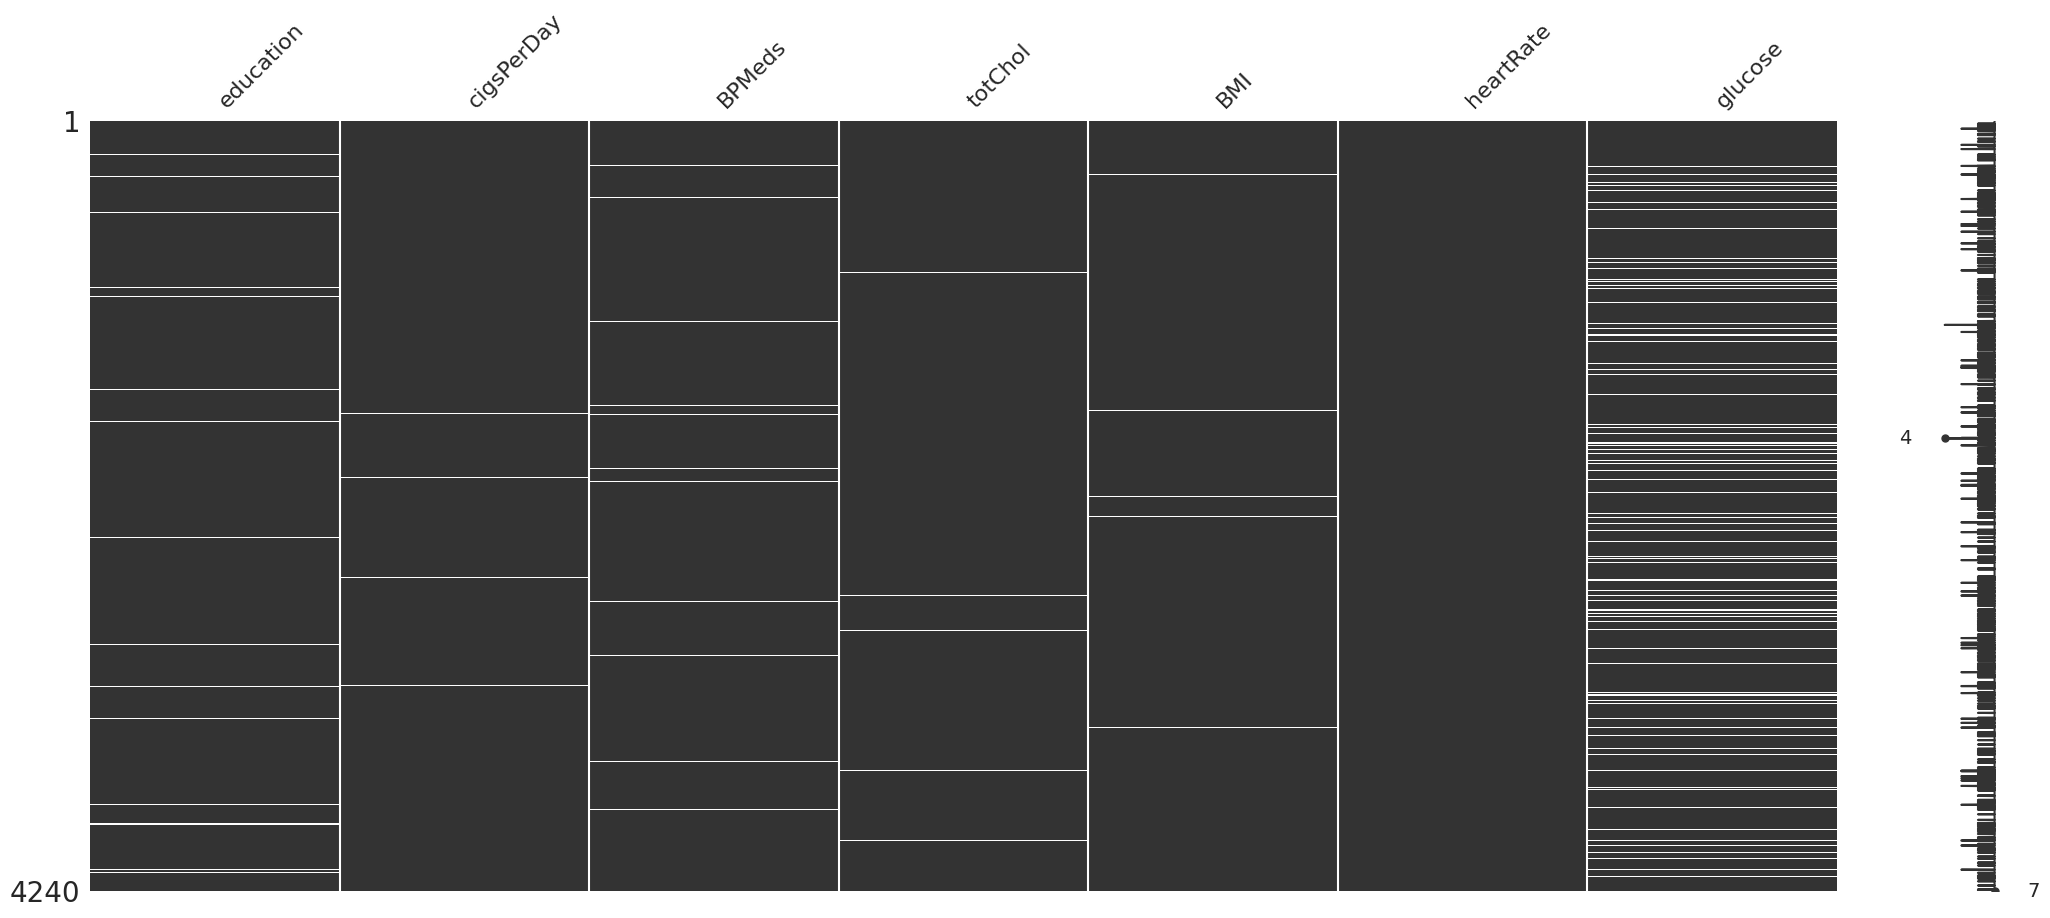

In [ ]:
#Visualizing columns with missing values
mno.matrix(data.loc[:, data.isna().any()], color = '0.2');

Cannot infer any values are missing systematically from the plot

In [ ]:
# Check for missing values
total = df.isnull().sum().sort_values(ascending=False)
total = total[total > 0]

percent = (df.isnull().sum() / df.shape[0] * 100).round(2).sort_values(ascending=False)
percent = percent[percent > 0]

dtypes = df.dtypes[total.index]

unique_count = df[total.index].nunique()

result = pd.concat([total, percent, dtypes, unique_count], axis=1, keys=['Total', 'Percentage', 'Dtype', 'Unique Count'])
result


,Total,Percentage,Dtype,Unique Count
glucose,388,9.15,float64,143
education,105,2.48,float64,4
BPMeds,53,1.25,float64,2
totChol,50,1.18,float64,248
cigsPerDay,29,0.68,float64,33
BMI,19,0.45,float64,1364
heartRate,1,0.02,float64,73


For continuous features missing completely at random, median always represent central tendency whether the distribution is skewed or not, so impute them using median

In [ ]:
col1 = ['glucose', 'totChol', 'cigsPerDay', 'BMI', 'heartRate']

for i in col1:
  df[i].fillna(df[i].median(), inplace = True)

For discrete features missing completely at random, mode represents the highest frequency of occurence, so impute them using mode

In [ ]:
col2 = ['education', 'BPMeds']

for i in col2:
  df[i].fillna(df[i].mode()[0], inplace = True)

In [ ]:
# Check for missing values
df.isnull().any().any()

False

## Outliers

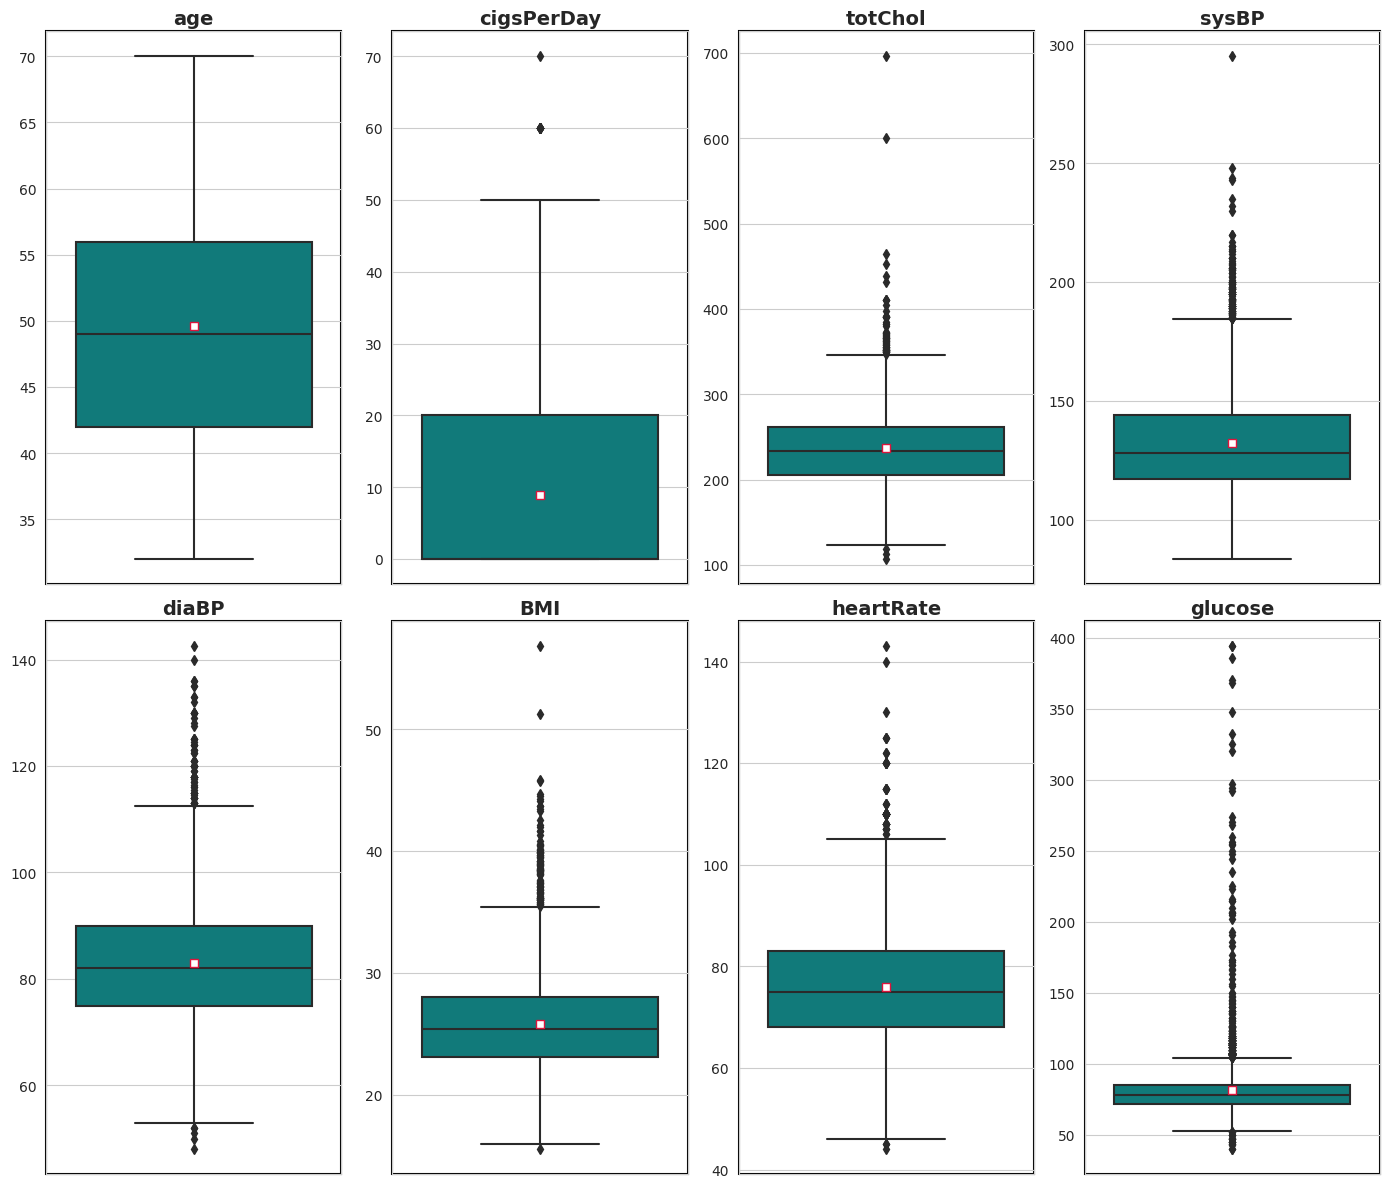

In [ ]:
contin_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

#Function for visualizing continous features, box plot
def box_plot(x):
    ax = sns.boxplot(y = df[x], color = 'darkcyan', showfliers = True, showmeans = True,
                     meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"crimson"})
    ax.set_ylabel('')
    ax.set_title('{}'.format(x), fontsize = 14, fontweight = 'bold', pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)

plt.figure(figsize = [14,12])
for i in range(len(contin_features)):
    plt.subplot(2,4,i+1)
    box_plot(contin_features[i])
plt.tight_layout()

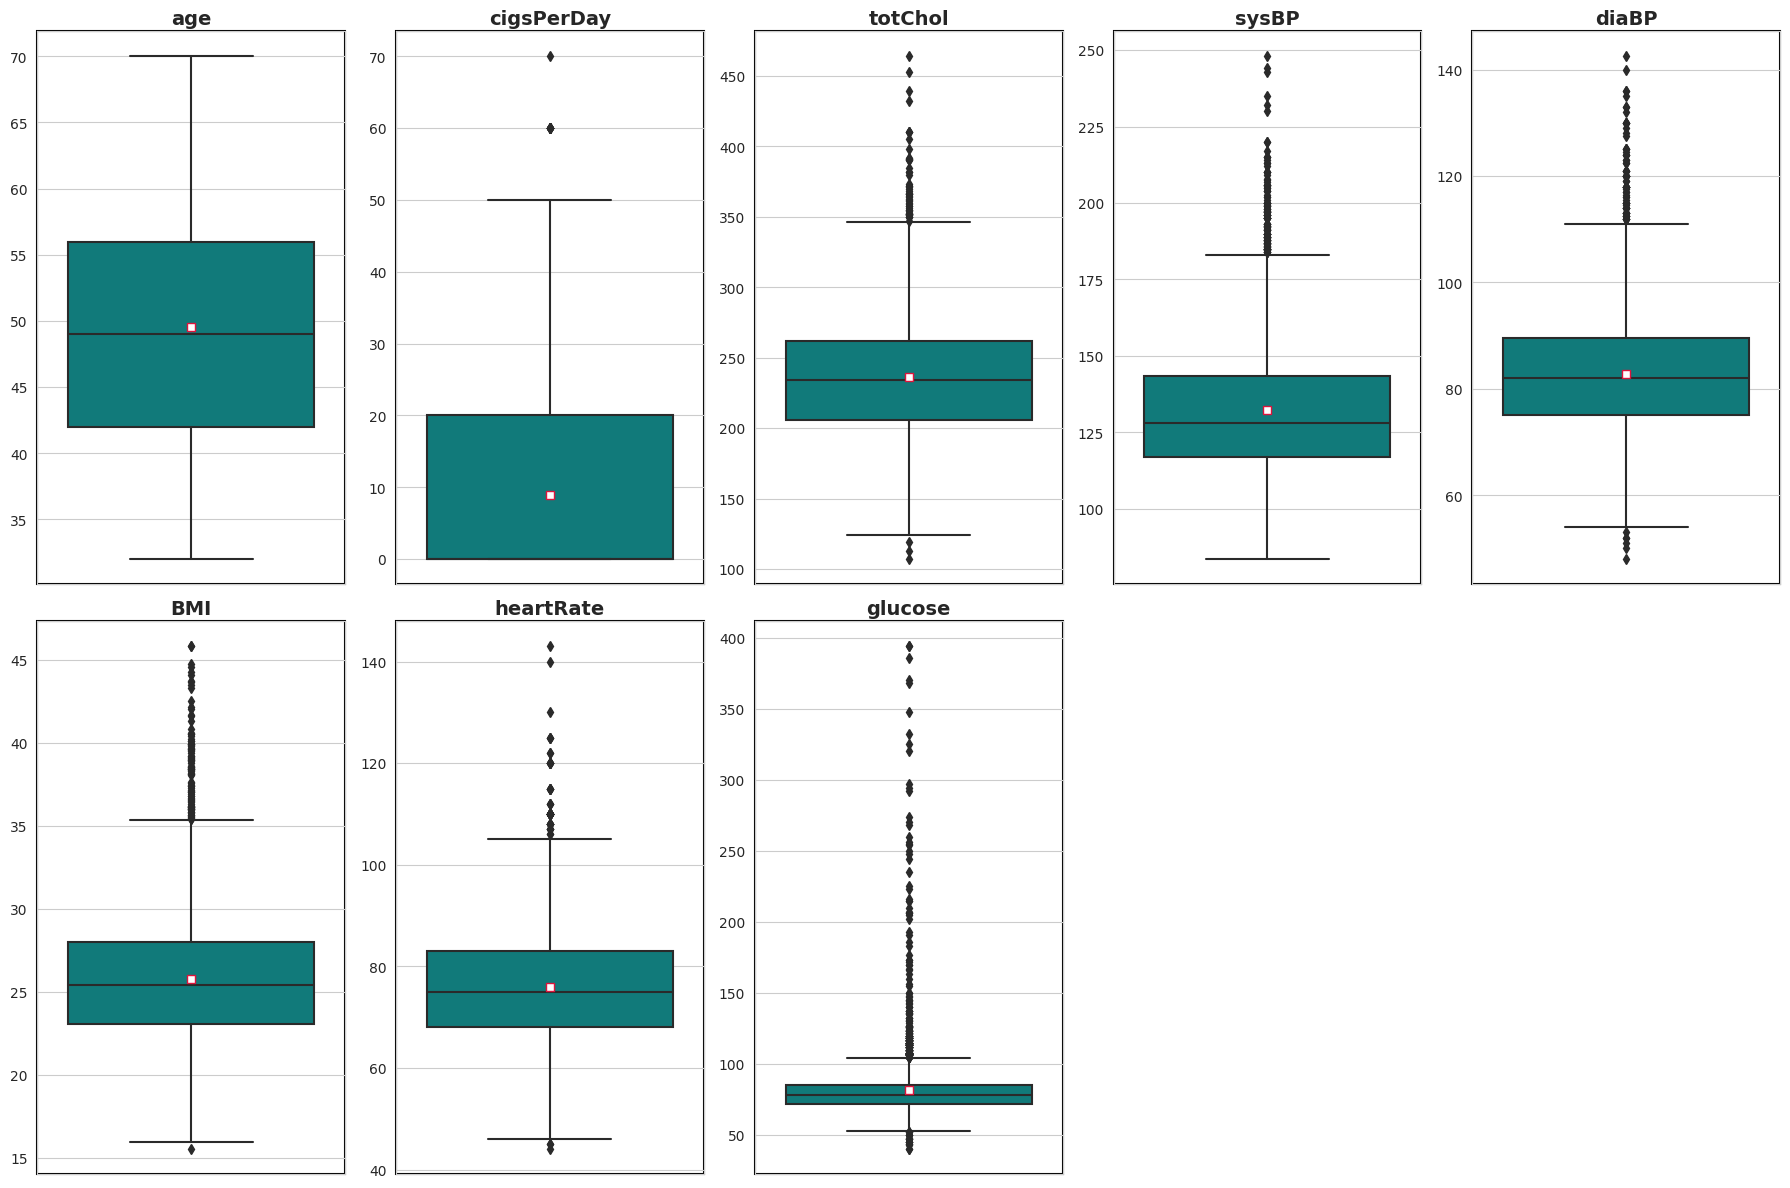

In [ ]:
# Remove Outliers and Visualize Effects on a Copy
df1 = df.copy()

#Function for visualizing continous features, box plot
def box_plot(x):
    ax = sns.boxplot(y = df1[x], color = 'darkcyan', showfliers = True, showmeans = True,
                     meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"crimson"})
    ax.set_ylabel('')
    ax.set_title('{}'.format(x), fontsize = 14, fontweight = 'bold', pad = 5)
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)

# Remove some extreme outliers
df1 = df1[df1['totChol'] < 500]
df1 = df1[df1['sysBP'] < 260]
df1 = df1[df1['BMI'] < 50]

plt.figure(figsize = [18,12])
for i in range(len(contin_features)):
    plt.subplot(2,5,i+1)
    box_plot(contin_features[i])
plt.tight_layout()

In [ ]:
df = df1
df.shape

(4235, 16)

Before outlier treatment, there was 4240 samples, so I have only removed 5 samples with extreme outliers.

# EDA

## Visualizing Target

This problem is a binary classification where TenYearCHD should be view as target

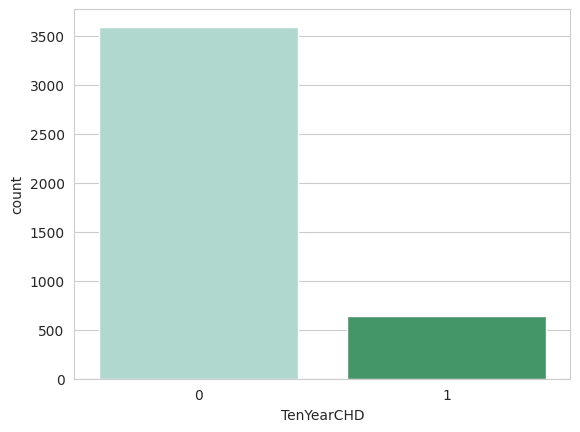

In [ ]:
# Count plot of TenYearCHD
sns.countplot(x = 'TenYearCHD',
              data = df,
              palette = 'BuGn'
              )
plt.show()

In [ ]:
percentage = df['TenYearCHD'].value_counts()[0]*100/(df['TenYearCHD'].value_counts()[1]+ df['TenYearCHD'].value_counts()[0])
percentage = round(percentage, 2)

print(f"Negative cases percentage: {percentage}%")

Negative cases percentage: 84.86%


Insights:
* Almost 85% percent of samples are labeled negative, indicating that there exists a class imbalance issue. Suppose we want to build a classification model, we should use stratified sampling during train_test_split to reduce bias of the model.

## Visualizing Discrete Features

In [ ]:
continuous_features = ['age', 'cigsPerDay', 'diaBP', 'totChol', 'sysBP', 'BMI', 'heartRate', 'glucose']
discrete_features = [col for col in df.columns if (col not in continuous_features) & (col != 'TenYearCHD')]
print(f'Discrete features are: {discrete_features}')

Discrete features are: ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


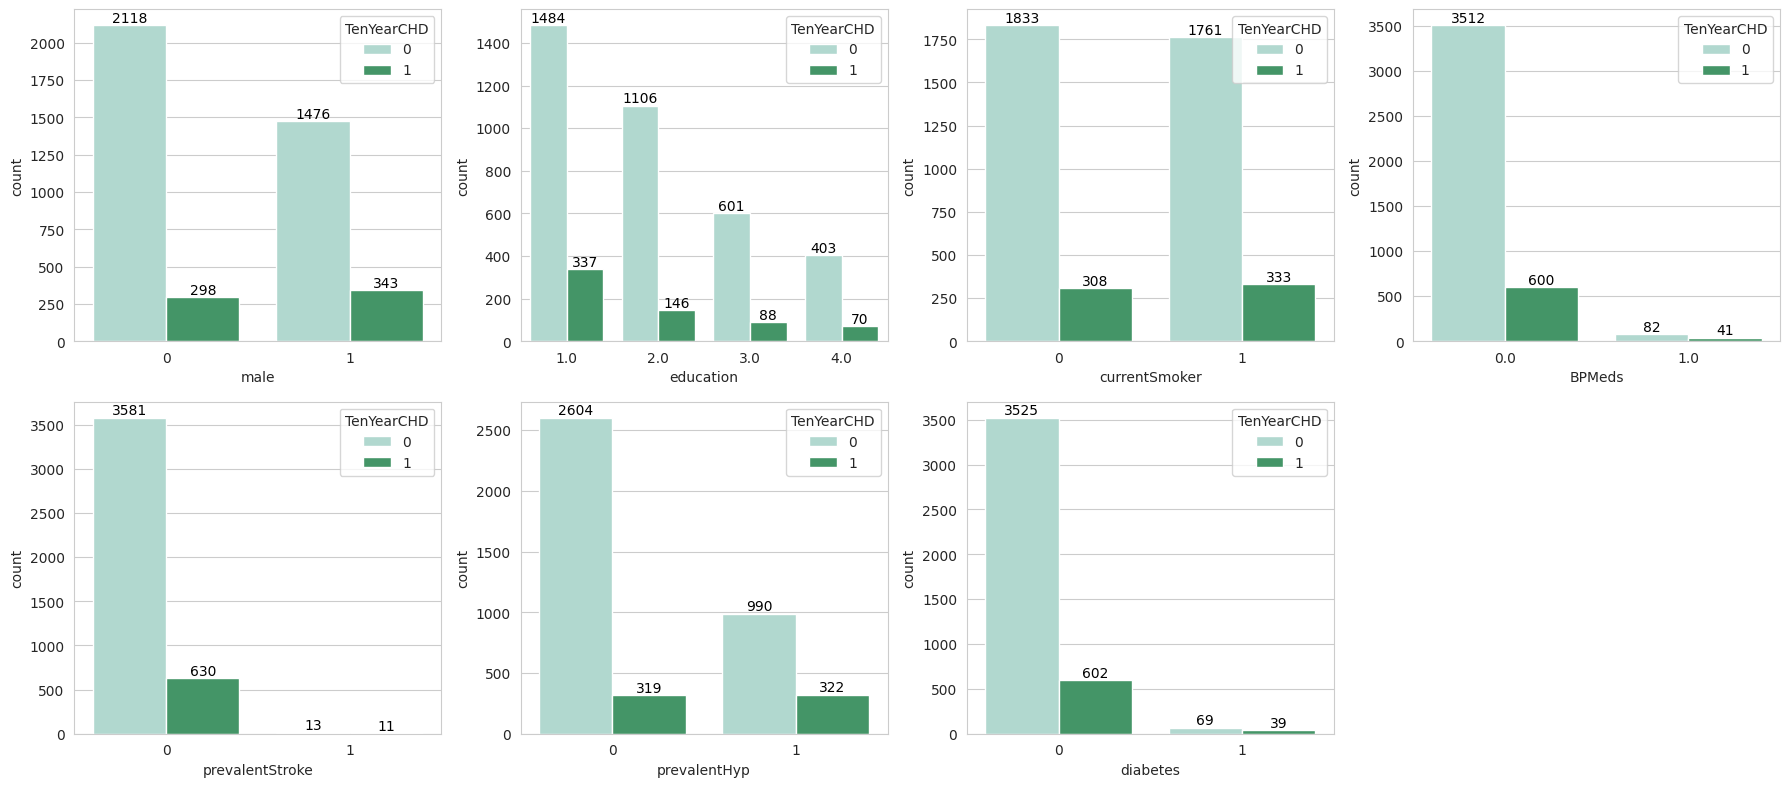

In [ ]:
# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(18, 8))
fig.subplots_adjust(hspace=0.5)  # Add some space between subplots

# Loop through discrete_features and create countplots
for i, feature in enumerate(discrete_features):
    ax = axes[i // 4, i % 4]  # Get the appropriate subplot
    sns.countplot(x=feature,
                  data=df,
                  palette='BuGn',
                  hue='TenYearCHD',
                  ax=ax)

    # Add count values on top of the bars as integers
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Remove empty subplots
for i in range(len(discrete_features), 8):
    fig.delaxes(axes[i // 4, i % 4])

plt.tight_layout()
plt.show()


Insights:
* Male has higher ratio to develop cardiovascular disease than female
* Objects who are taking blood pressure medication (BPMeds) have higher ratio to develop cardiovascular disease than those who are not
* Objects who have prevalent stroke (prevalentStroke) have higher ratio to develop cardiovascular disease than those who are not
* Objects who have (prevalentHyp) have higher ratio to develop cardiovascular disease than those who are not
* Objects who have (diabetes) have higher ratio to develop cardiovascular disease than those who are not

## Visualizing Continuous Features

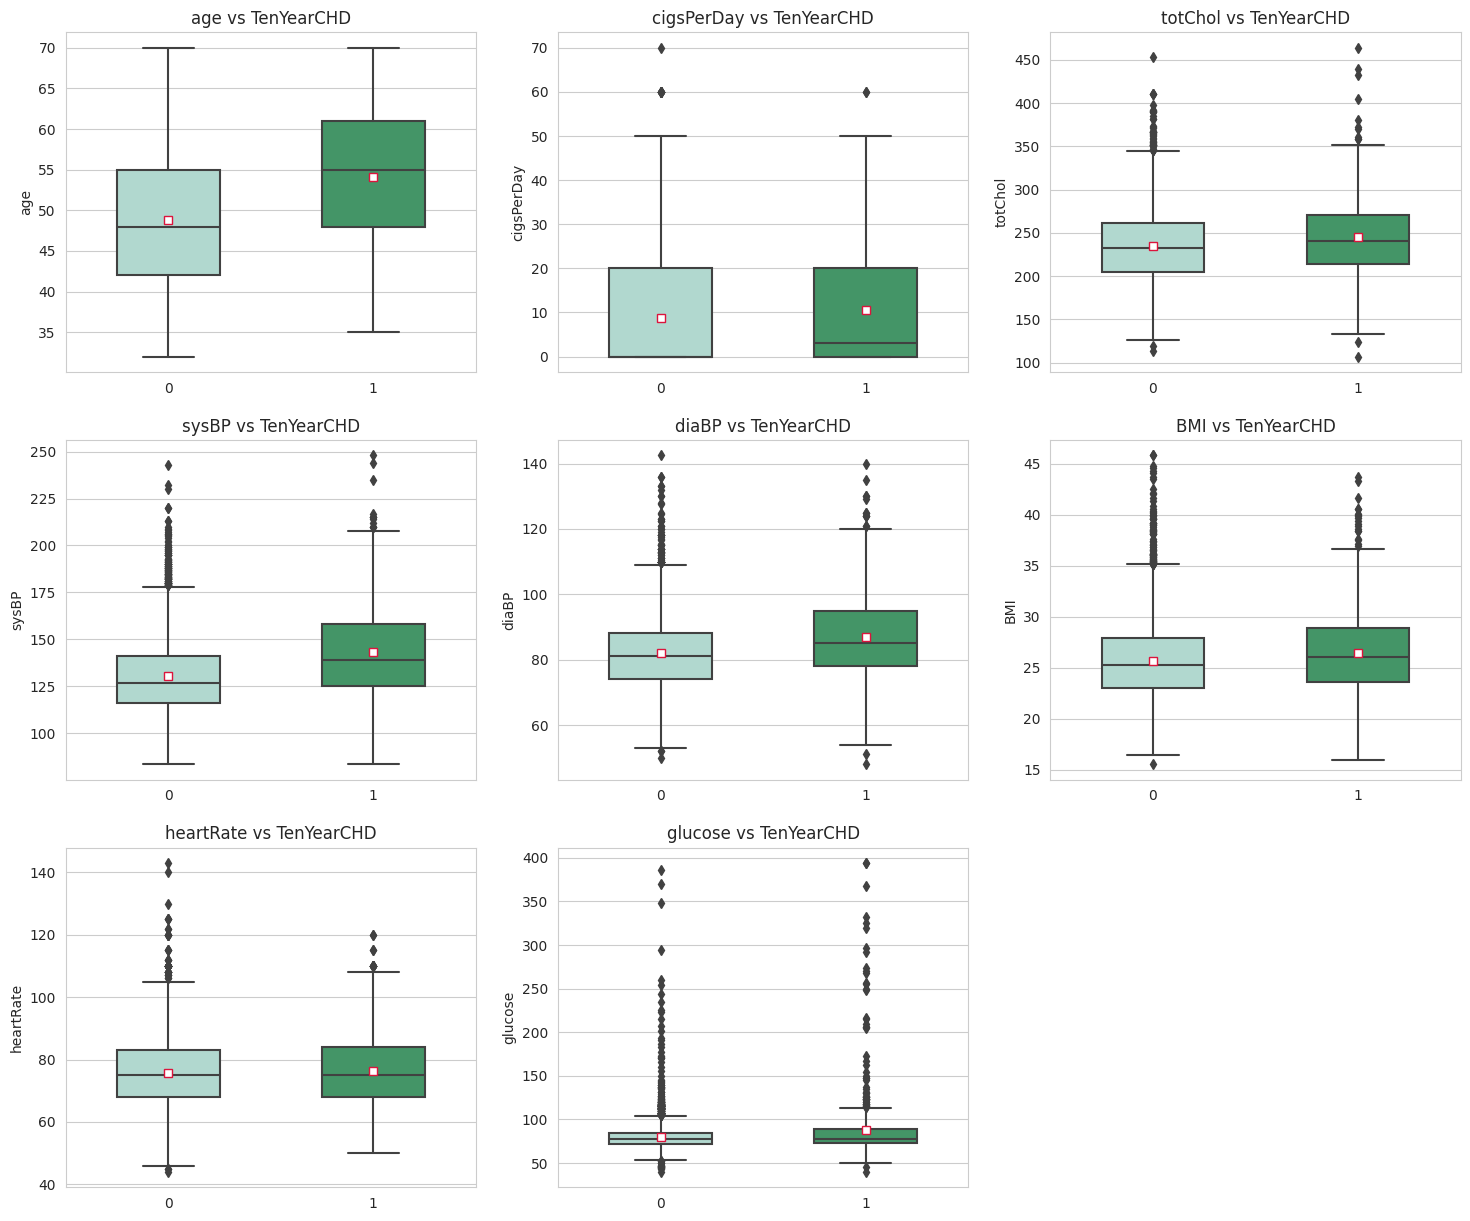

In [ ]:
# List of continuous features
continuous_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Continuous features vs target
plt.figure(figsize=(18, 15))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='TenYearCHD', y=feature, palette = 'BuGn', width=0.5, fliersize=5, showmeans = True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"crimson"} )
    plt.title(f'{feature} vs TenYearCHD')
    plt.xlabel('')

plt.show()


Insights:
* Ojects who have cardiovascular disease tend to have higher age than those don't
* Ojects who have cardiovascular disease tend to have higher sysBP than those don't
* Ojects who have cardiovascular disease tend to have higher diaBP than those don't

Note: 'tend' means central tendency based on distribution

## Scatter Plot

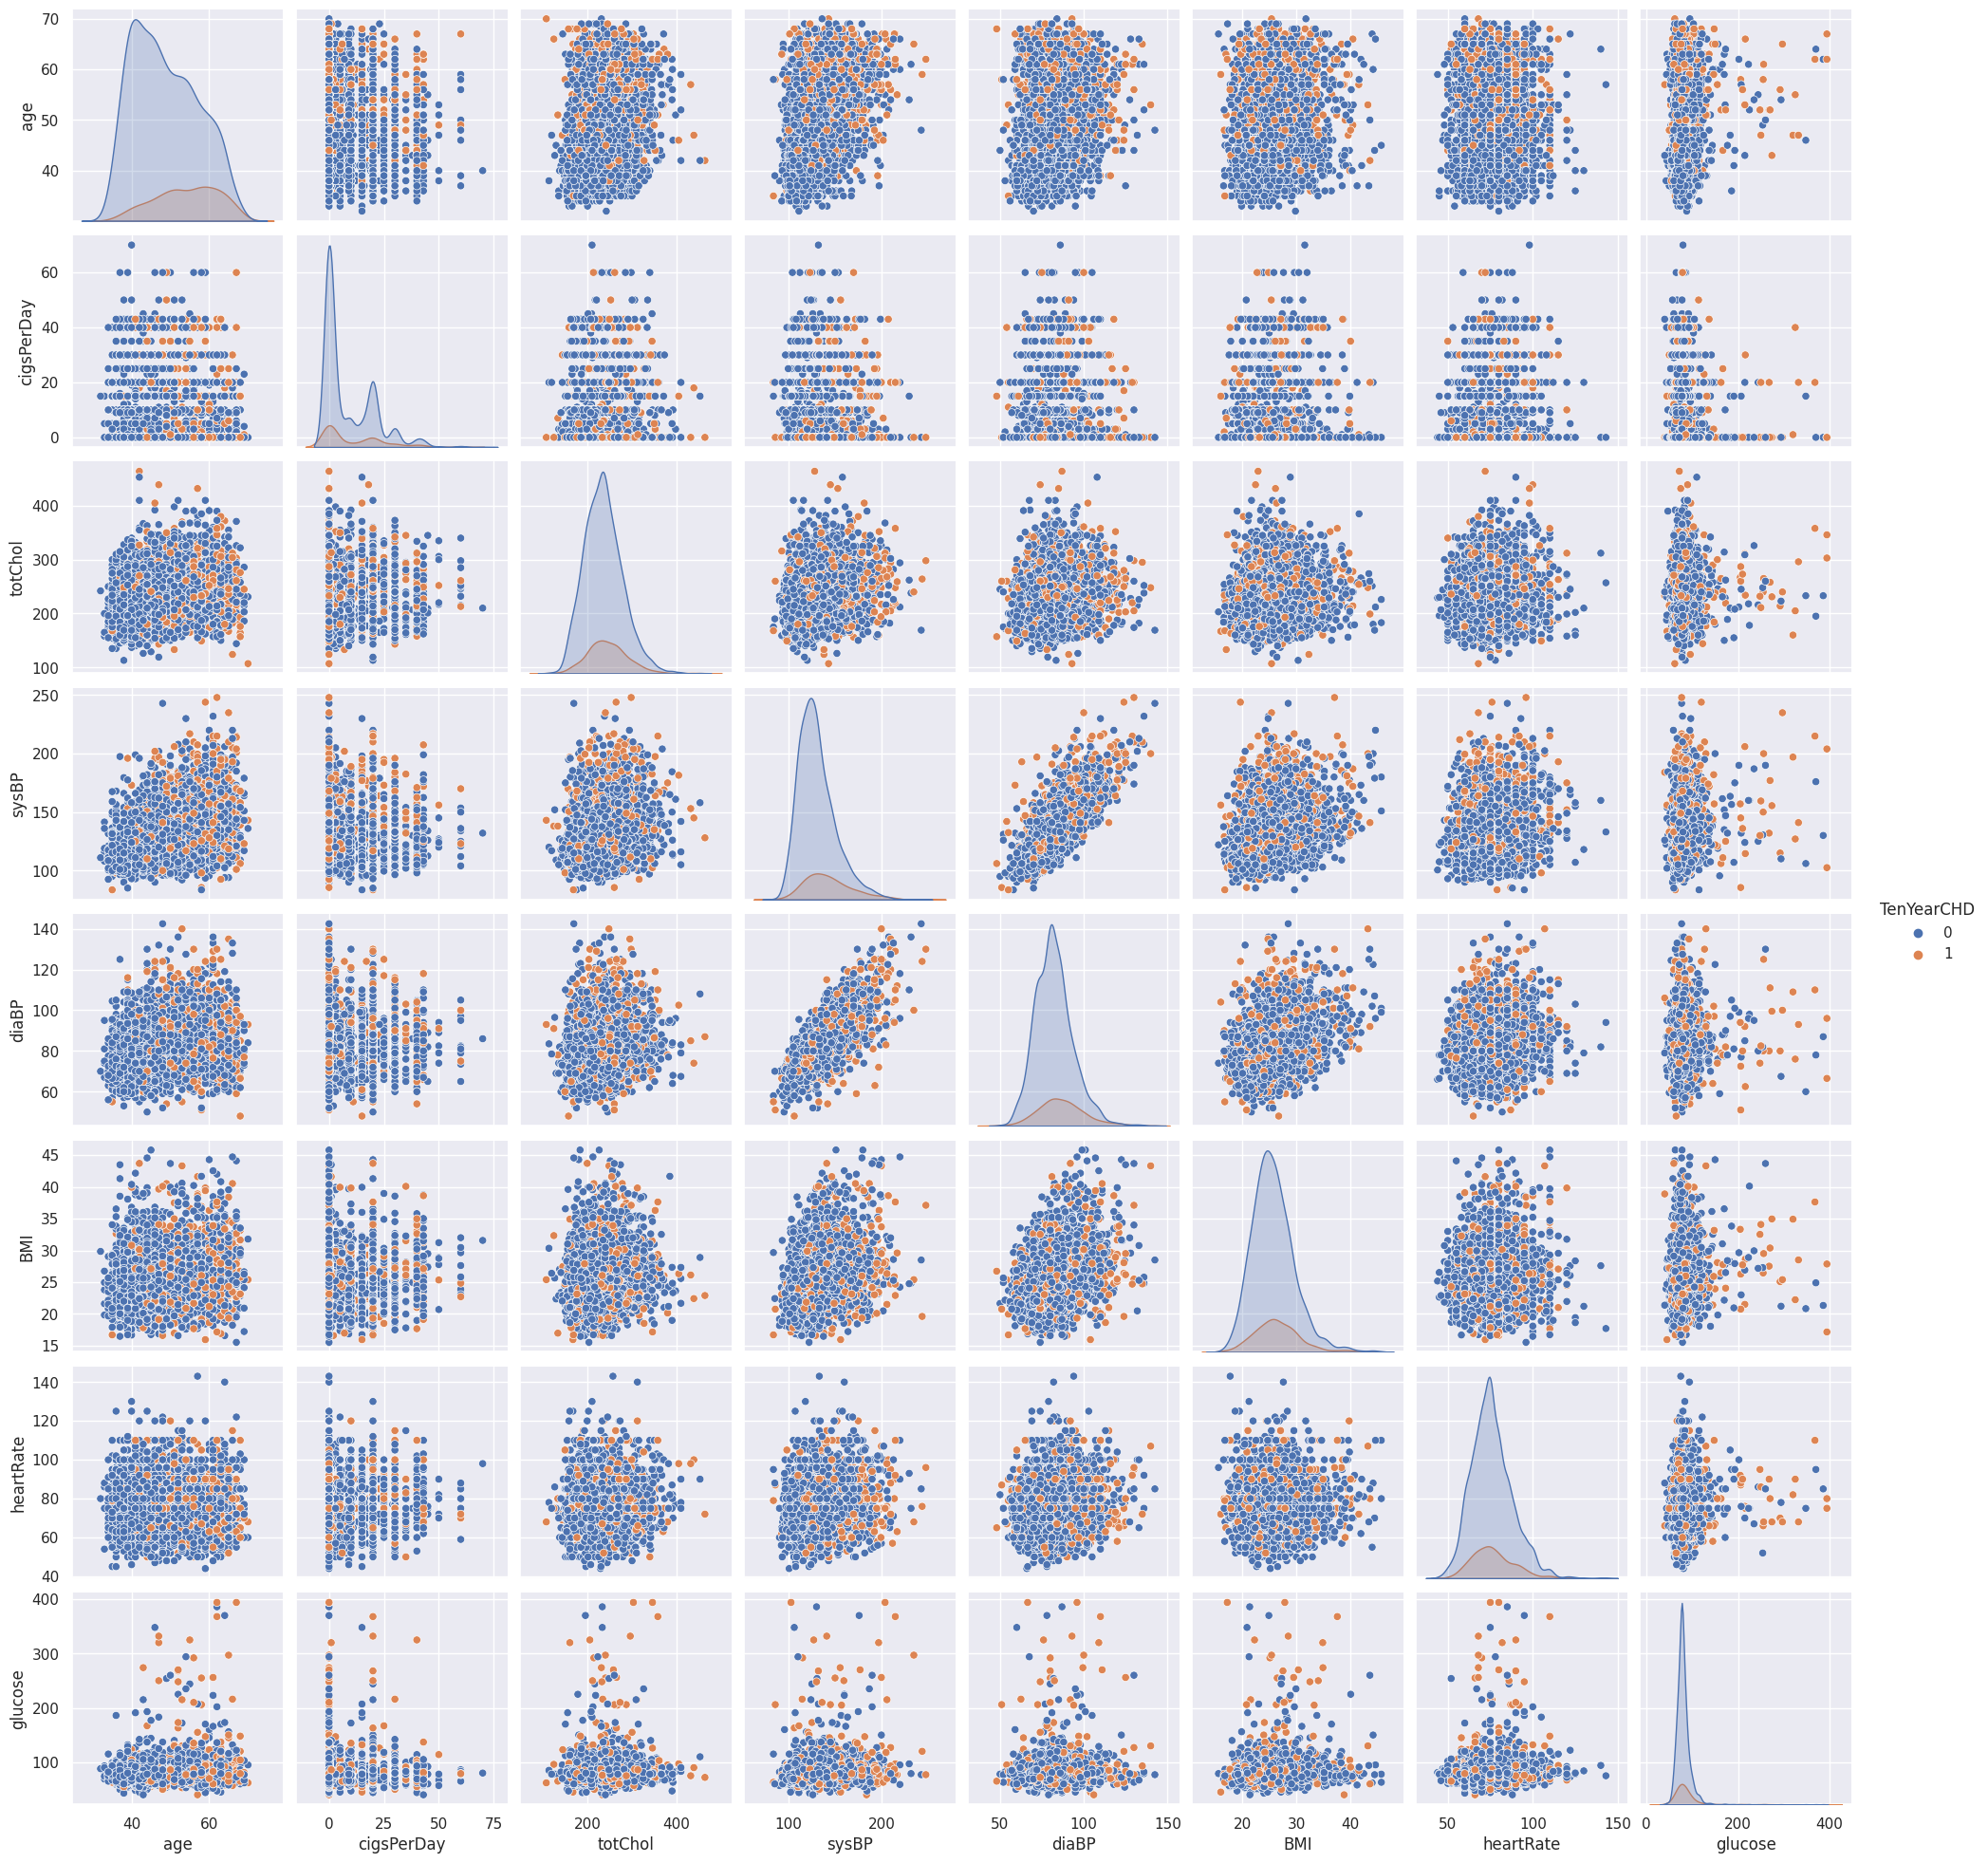

In [ ]:
# Pair Plot
contin_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

sns.set()
sns.pairplot(df[contin_cols], hue = 'TenYearCHD', height=2.5)
plt.show()

Insights:
* There is a clear positive correlation btw diaBP & sysBP
* Distribution of age is close to normal, while all other features are positively skewed to different degrees


## Correlation Matrix

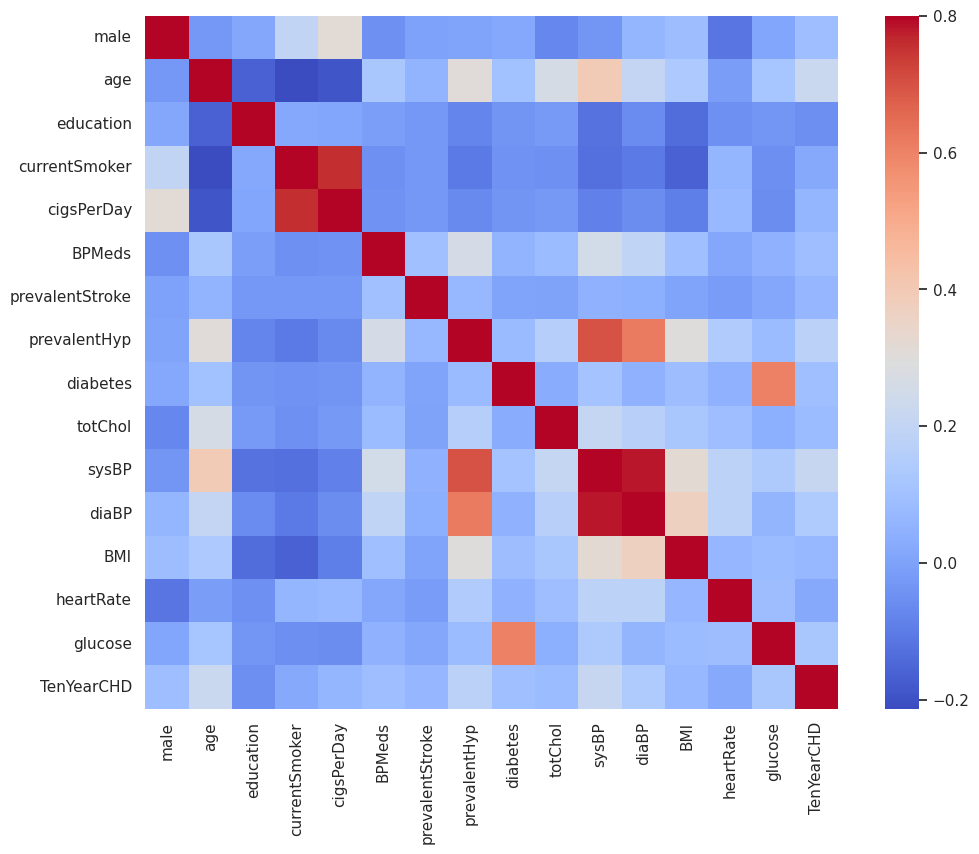

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 9))

# Draw the heatmap
sns.heatmap(corr_matrix, vmax=.8, square=True, cmap='coolwarm')
plt.show()

In [ ]:
# Find features with correlation higher than 0.6
highly_correlated_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.6:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            highly_correlated_features.add((colname_i, colname_j))

highly_correlated_features

{('cigsPerDay', 'currentSmoker'),
 ('diaBP', 'prevalentHyp'),
 ('diaBP', 'sysBP'),
 ('glucose', 'diabetes'),
 ('sysBP', 'prevalentHyp')}

So far, these are pairs of features where multicolinearity may exist, which can be treated in dimensionality reduction

# Summary

Data Cleaning log:
* No duplicates
* 'glucose', 'totChol', 'cigsPerDay', 'BMI', 'heartRate' are imputed with median
* 'education', 'BPMeds' are imputed with mode
* Extreme outliers are removed

EDA insights:
* Almost 85% percent of samples are labeled negative, there exists a class imbalance issue. Suppose we want to build a classification model, we should use stratified sampling during train_test_split to reduce bias of the model
* Male has higher ratio to develop cardiovascular disease than female
* Objects who are taking blood pressure medication have higher ratio to develop cardiovascular disease than those who are not
* Objects who have prevalent stroke have higher ratio to develop cardiovascular disease than those who are not
* Objects who have prevalentHyp have higher ratio to develop cardiovascular disease than those who are not
* Objects who have diabetes have higher ratio to develop cardiovascular disease than those who are not
* Ojects who have cardiovascular disease tend to have higher age than those don't
* Ojects who have cardiovascular disease tend to have higher sysBP than those don't
* Ojects who have cardiovascular disease tend to have higher diaBP than those don't
* There is a clear positive correlation btw diaBP & sysBP
* Distribution of age is close to normal, while all other features are positively skewed to different degrees
* ('cigsPerDay', 'currentSmoker'),
 ('diaBP', 'prevalentHyp'),
 ('diaBP', 'sysBP'),
 ('glucose', 'diabetes'),
 ('sysBP', 'prevalentHyp') are pairs of features where multicolinearity may exist, which can be treated in dimensionality reduction